# Quantum Computing

In [25]:
# Imports
import qiskit as q
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor
# from qiskit.tools.visualization import plot_bloch_sphere
from qiskit.visualization import plot_histogram, matplotlib
import matplotlib.pyplot as plt
from utils import dotdict

In [28]:
# Config 
config = dotdict()
config.location = "local"  # local or remote
config.sim_backend = "qasm_simulator"
config.backend = ""
config.shots = 500

In [31]:
# Backend
if config.location == "local":
    # Run locally.
    backend = q.Aer.get_backend(config.sim_backend)
else:
    # Run on backend.
    IBMQ.save_account(open("token.txt", "r").read())
    IBMQ.load_account()
    provider = IBMQ.get_provider("ibm-q")
    for backend in provider.backends():
        try:
            qubit_count = len(backend.properties().qubits)
        except:
            qubit_count = "simulated"
        print(f"{backend.name():35} has {backend.status().pending_jobs:8} queued and {qubit_count:12} qubits")
    backend = ""

     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


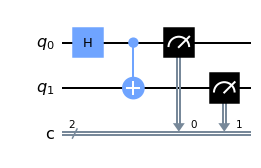

In [47]:
# Build the quantum circuit
circuit = q.QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0, 1], [0, 1])
circuit.draw()
print(circuit)
circuit.draw(output="mpl")

In [35]:
# Build the job
job = q.execute(circuit, backend=backend, shots=config.shots)
job_monitor(job)

Job Status: job has successfully run


In [36]:
# Results
result = job.result()
counts = result.get_counts(circuit)
print(counts)

{'11': 247, '00': 253}


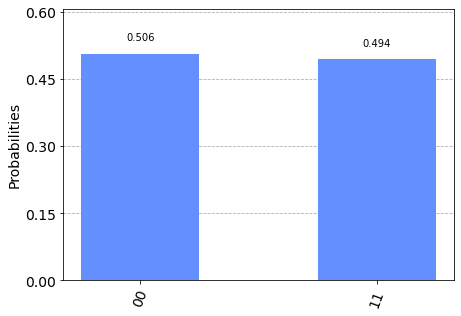

In [37]:
# Visualize
plot_histogram([counts])